$$\text{Trịnh Dương Hoan - 22684251}$$

### Lab Task

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### 1: Apply following transformation techniques on image provided and observe the output image of each transformation.

In [2]:
path_img = r'./Albert_Einstein.png'

(<matplotlib.image.AxesImage at 0x2604ce94770>,
 (np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5)))

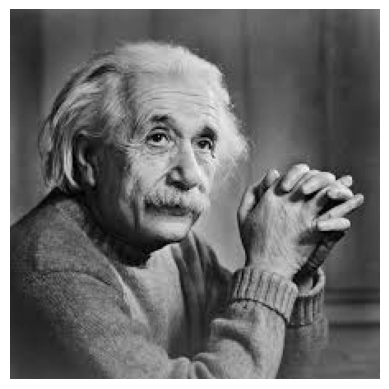

In [3]:
init_image = cv2.imread(path_img, cv2.IMREAD_GRAYSCALE)
plt.imshow(init_image, cmap='gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x26050b4de20>,
 (np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5)),
 Text(0.5, 1.0, 'Negative transformation'))

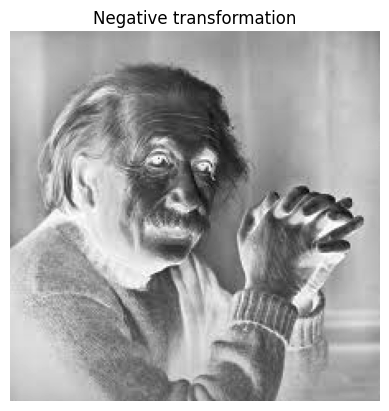

In [16]:
# Negative transformation
negative_image = 255 - init_image
plt.imshow(negative_image, cmap='gray'), plt.axis('off'), plt.title('Negative transformation')


C:\Users\DuongHoan\AppData\Local\Temp\ipykernel_8540\591397357.py:4: RuntimeWarning: divide by zero encountered in log
  return c * np.log(1 + image)


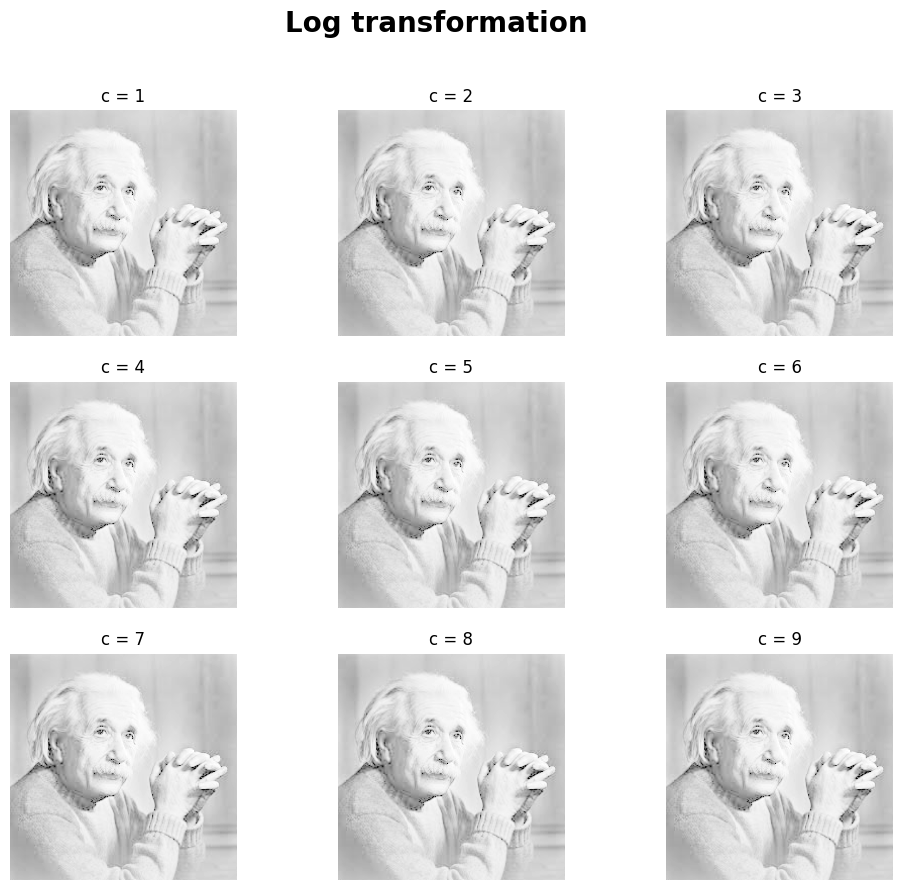

In [48]:
# Log transformation

def log_transformation(image, c):
    return c * np.log(1 + image)    

plt.figure(figsize=(12, 10))
plt.suptitle('Log transformation', fontsize=20, fontweight='bold')
for c in range(1, 10):
    log_image = log_transformation(init_image, c)
    plt.subplot(3, 3, c)
    plt.imshow(log_image, cmap='gray'), plt.axis('off'), plt.title(f'c = {c}')



#### 2: Apply the following transformation on an image.

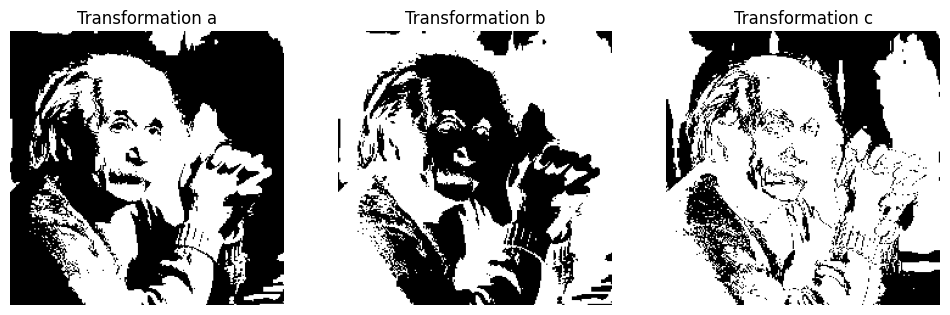

In [64]:
# Tính giá trị trung bình
mean_val = np.mean(init_image)

# (a) Nhỏ hơn trung bình thành 0, lớn hơn thành 255
transform_a = np.where(init_image < mean_val, 0, 255)

# (b) Ngược lại, nhỏ hơn trung bình thành 255, lớn hơn thành 0
transform_b = np.where(init_image < mean_val, 255, 0)

# (c) ±20 của giá trị trung bình thành 0, ngược lại thành 255
transform_c = np.where((init_image >= mean_val - 20) & (init_image <= mean_val + 20), 0, 255)

# Hiển thị ảnh sau khi biến đổi
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1), plt.imshow(transform_a, cmap='gray'), plt.title('Transformation a'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(transform_b, cmap='gray'), plt.title('Transformation b'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(transform_c, cmap='gray'), plt.title('Transformation c'), plt.axis('off')
plt.show()


#### 3:Apply Power Law transformation for the following values of γ (0.2, 0.5, 1.2 and 1.8) . Make sure to adjust data types accordingly

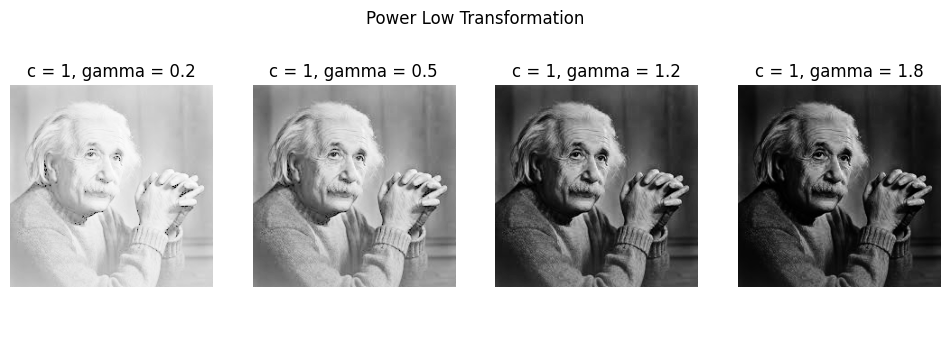

In [62]:
def Power_Low_Transformation(image, gamma, c):
    return c * np.power(image, gamma)

list_grammas = [0.2, 0.5, 1.2, 1.8]
c = 1
plt.figure(figsize=(12, 4))
# plt.suptitle('Power Low Transformation', fontsize=20, fontweight='bold')
plt.title('Power Low Transformation')
plt.axis('off')
for i, gamma in enumerate(list_grammas):
    power_low_image = Power_Low_Transformation(init_image, gamma, c)
    plt.subplot(1, 4, i+1)
    plt.imshow(power_low_image, cmap='gray'), plt.axis('off'), plt.title(f'c = {c}, gamma = {gamma}')

#### 4:Apply Gray level slicing using lower limit 100 and upper limit 200. Set all these values to 210

(<matplotlib.image.AxesImage at 0x2605b97e3c0>,
 (np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5)),
 Text(0.5, 1.0, 'Gray level slicing'))

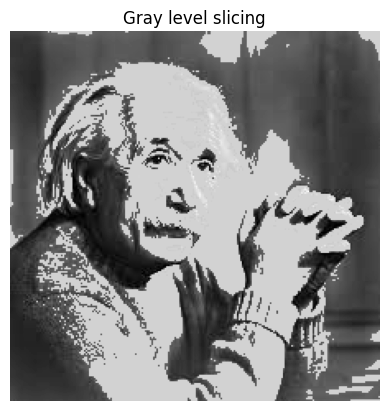

In [66]:
gray_level_image = np.where((init_image >= 100) & (init_image <= 200), 210, init_image)

plt.imshow(gray_level_image, cmap='gray'), plt.axis('off'), plt.title('Gray level slicing')

### HomeTask

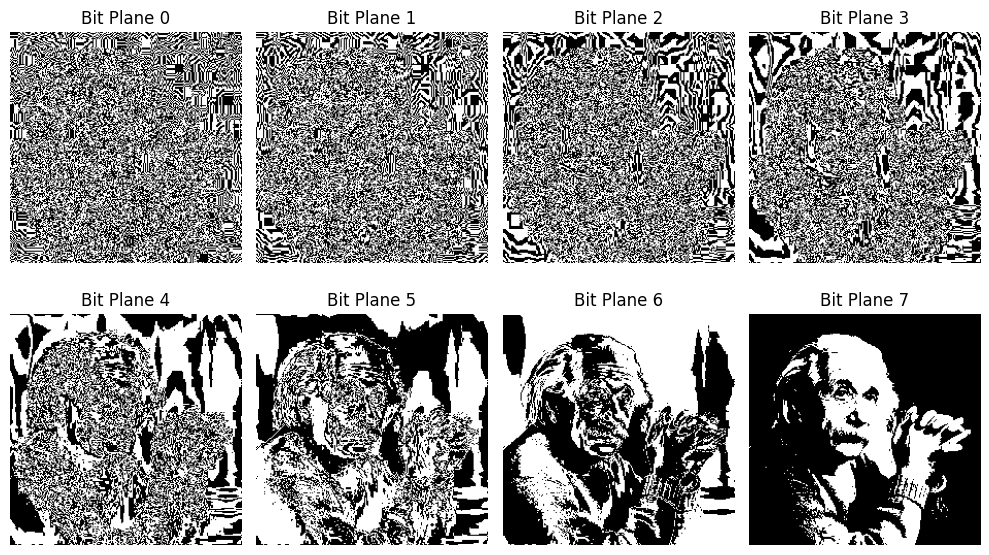

In [67]:
# Hàm thực hiện Bit Plane Slicing
def bit_plane_slicing(image, bit_position):
    # Dịch bit sang bên phải (shift bit) và lấy bit ở vị trí bit_position
    return np.bitwise_and(np.right_shift(image, bit_position), 1) * 255

# Lưu các bit plane
bit_planes = []
for i in range(8):
    bit_plane = bit_plane_slicing(init_image, i)
    bit_planes.append(bit_plane)
    # Lưu ảnh sau khi slice từng bit plane
    cv2.imwrite(f'bit_plane_{i}.png', bit_plane)

# Hiển thị các bit plane
plt.figure(figsize=(10, 6))
for i, bit_plane in enumerate(bit_planes):
    plt.subplot(2, 4, i+1), plt.imshow(bit_plane, cmap='gray')
    plt.title(f'Bit Plane {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()
